<Body>   
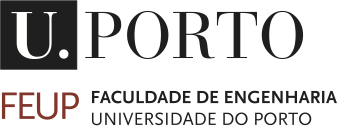   
<h1> <b>Master Thesis - Vision-based Smart Sprayer for Precision Farming </b> </h1>
<p><b>João Henrique Torres Santos, Thaidy Deguchi </b> up201802575@edu.fe.up.pt </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

## **1.Training and Testing**

 The main objective of this part was to develop a perception algorithm to identify and segment grapes in a vineyard. After the grape localization, the code must command the hardware to point the spray in the grape direction. The hardware will also point a laser to the fruit. The code must segment the laser color from the image to validate the grape position. After all these steps, the hardware must perform the spray action only in the grapes.

The dataset used can be found in the following link: http://bit.ly/42cDU1N and http://bit.ly/3lqx2gq. 

This notebook was taken and modified from the example template present https://github.com/ultralytics/ultralytics last accessed at (2023/03/10). 

# Step 1: Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 18.11 MiB/s, done.
Resolving deltas: 100% (10497/10497), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
     

# Step 2: Mount Google Drive

The following commands mount the google drive and import the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Master_Thesis_2/grapesv8.zip -d /content/data

# Step 3: Train Our Custom YOLOv5 model


**For initial training:**

Here, we are able to pass a number of arguments:
- **mode** define the mode of yolo
- **task** define the task of yolo
- **model** defines the pre trained model wanted
- **imgsz:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs.
- **data:** Our dataset location is saved in the `dataset.location`
- **patience** define the number of epoch without evolution to early stop
- **cache:** cache images for faster training
- **project:** save each epoch in the desired path (gdrive in this case)
- **name:** assign a name to the Run folder 

**For resume training:**

If there is a need to stop the training and continue later, it is possible to use checkpoints.

- **resume:** path to where the last trained epoch is saved.



In [ ]:
# Train YOLOv8n on COCO128 for 3 epochs/Run_Fusion_v8/
!yolo train mode="train" task="detect" save=True plots=True model="/content/drive/MyDrive/Runs/Run_Fusion_v8_aug_nano_fit2/weights/best.pt" data="/content/data2/grapev8/data.yaml" epochs=100 batch=32 imgsz=640 project="/content/drive/MyDrive/Runs"  name=Run_Fusion_v8_aug_nano_over cache=True patience=25

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/data.yaml, hyp=/content/yolov5/data/hyps/hyp.VOC.yaml, epochs=300, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/Runs, name=Run_Fusion, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.00334, lrf=0.15135, momentum=0.74832, weight_decay=0.00025, warmup_epochs=3.3835, warmup_momentum=0.59462, warmup_bias_lr=0.18657, box=0.02, cls=0.21638, cls_pw=0.5, obj=0.51728, obj_pw=

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!yolo val model=/content/drive/MyDrive/Runs2/Run_Fusion2/weights/best.pt  data=/content/yolov5/data/data.yaml

val: data=/content/yolov5/data/data.yaml, weights=['/content/drive/MyDrive/Runs2/Run_Fusion2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/data/grape/valid/labels.cache... 602 images, 0 backgrounds, 0 corrupt: 100% 602/602 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/data/grape/valid/images/104_jpg.rf.2bcec9f146655bd2393b56db384369eb.jpg: 10 duplicate labels removed
val: WARNING ⚠️ /content/data/grape/valid/images/10_jpg.rf.3b20b369dd63908c15f1975b87ef2082.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/data/grape/valid/images/1

# Conclusion 

The model is saved on gdrive, the followinig code download the detect images folder. 

In [ ]:
!yolo predict model="/content/drive/MyDrive/Runs/Run_Fusion_v8_aug_nano_fit2/weights/last.pt" source='/content/data/grape/test/images/*.jpg' save=True

detect: weights=['/content/drive/MyDrive/Runs2/Run_Fusion2/weights/best.pt'], source=/content/data/grape/test/images/*.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/100 /content/data/grape/test/images/1597920484565_jpg.rf.9319b358c253f1ad41ff4b2cbe3b2b5c.jpg: 640x640 4 grape bunchs, 12.6ms
image 2/100 /content/data/grape/test/images/1597924240796_jpg.rf.d2ed7e91cfa417392a00054a32fc62ec.jpg: 640x640 11 grape bunchs, 12.7ms
image 3/100 /content/data/grape/te

In [ ]:
#export your model's weights for future use
from google.colab import files
!zip -r /content/file.zip /content/yolov5/runs
files.download('/content/file.zip')

updating: content/yolov5/runs/ (stored 0%)
updating: content/yolov5/runs/val/ (stored 0%)
updating: content/yolov5/runs/val/.ipynb_checkpoints/ (stored 0%)
updating: content/yolov5/runs/val/exp2/ (stored 0%)
updating: content/yolov5/runs/val/exp2/val_batch1_labels.jpg (deflated 3%)
updating: content/yolov5/runs/val/exp2/R_curve.png (deflated 17%)
updating: content/yolov5/runs/val/exp2/val_batch1_pred.jpg (deflated 3%)
updating: content/yolov5/runs/val/exp2/val_batch0_labels.jpg (deflated 4%)
updating: content/yolov5/runs/val/exp2/val_batch0_pred.jpg (deflated 4%)
updating: content/yolov5/runs/val/exp2/PR_curve.png (deflated 18%)
updating: content/yolov5/runs/val/exp2/val_batch2_pred.jpg (deflated 3%)
updating: content/yolov5/runs/val/exp2/P_curve.png (deflated 18%)
updating: content/yolov5/runs/val/exp2/confusion_matrix.png (deflated 37%)
updating: content/yolov5/runs/val/exp2/val_batch2_labels.jpg (deflated 4%)
updating: content/yolov5/runs/val/exp2/F1_curve.png (deflated 18%)
updatin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>